In [1]:
from IPython.display import display, Markdown, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CKN-Case-Study-2:-Ca2+-and-redox-response)" data-toc-modified-id="CKN-Case-Study-2:-Ca2+-and-redox-response)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>CKN Case Study 2: Ca<sup>2+</sup> and redox response)</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Library-import" data-toc-modified-id="Library-import-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Library import</a></span></li><li><span><a href="#Path-and-Parameter-definitions" data-toc-modified-id="Path-and-Parameter-definitions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Path and Parameter definitions</a></span></li><li><span><a href="#Load-CKN" data-toc-modified-id="Load-CKN-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Load CKN</a></span></li></ul></li><li><span><a href="#Filtering" data-toc-modified-id="Filtering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Filtering</a></span><ul class="toc-item"><li><span><a href="#Filtering-node-types" data-toc-modified-id="Filtering-node-types-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Filtering node types</a></span></li><li><span><a href="#Filtering-tissue-types" data-toc-modified-id="Filtering-tissue-types-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Filtering tissue types</a></span></li><li><span><a href="#Perform-filtering" data-toc-modified-id="Perform-filtering-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Perform filtering</a></span></li><li><span><a href="#Filtering-edge-ranks" data-toc-modified-id="Filtering-edge-ranks-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Filtering edge ranks</a></span></li></ul></li><li><span><a href="#Load-proteomic-data" data-toc-modified-id="Load-proteomic-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load proteomic data</a></span><ul class="toc-item"><li><span><a href="#Load-targets" data-toc-modified-id="Load-targets-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Load targets</a></span></li></ul></li><li><span><a href="#Define-Ca2+-annotated-source-nodes" data-toc-modified-id="Define-Ca2+-annotated-source-nodes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Define Ca<sup>2+</sup> annotated source nodes</a></span></li><li><span><a href="#Path-analysis" data-toc-modified-id="Path-analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Path analysis</a></span><ul class="toc-item"><li><span><a href="#Shortest-paths-in-CKN" data-toc-modified-id="Shortest-paths-in-CKN-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Shortest paths in CKN</a></span></li><li><span><a href="#Paths-in-CKN" data-toc-modified-id="Paths-in-CKN-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Paths in CKN</a></span></li><li><span><a href="#Shortest-path-edges" data-toc-modified-id="Shortest-path-edges-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Shortest path edges</a></span></li></ul></li><li><span><a href="#Cuts-on-the-merged-shortest-paths" data-toc-modified-id="Cuts-on-the-merged-shortest-paths-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Cuts on the merged shortest paths</a></span></li><li><span><a href="#Context-graph" data-toc-modified-id="Context-graph-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Context graph</a></span></li><li><span><a href="#Table-attributes-from-the-networks" data-toc-modified-id="Table-attributes-from-the-networks-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Table attributes from the networks</a></span></li><li><span><a href="#Cytoscape" data-toc-modified-id="Cytoscape-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Cytoscape</a></span><ul class="toc-item"><li><span><a href="#Cuts" data-toc-modified-id="Cuts-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Cuts</a></span></li><li><span><a href="#Grouping-source-type" data-toc-modified-id="Grouping-source-type-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Grouping source type</a></span></li><li><span><a href="#Layout-by-groups" data-toc-modified-id="Layout-by-groups-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Layout by groups</a></span></li><li><span><a href="#View-proteomics-data" data-toc-modified-id="View-proteomics-data-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>View proteomics data</a></span></li></ul></li></ul></div>

# CKN Case Study 2: Ca<sup>2+</sup> and redox response)

# Setup

## Library import
We import all the required Python libraries

In [2]:
import sys, re, pickle
from pathlib import Path
from datetime import datetime
from IPython.display import Markdown, display
from collections import defaultdict

import pandas as pd
import seaborn as sns
import networkx as nx

In [3]:
# vis
import matplotlib.pyplot as plt

The following allows us to import functions from the skm-tools package. 
Note the relative path to the folder containing the 
"skm-tools" directory. 

In [4]:
sys.path.append("../")
from skm_tools import load_networks, ckn_utils

In [5]:
from importlib import reload

In [6]:
today = datetime.today().strftime('%Y.%m.%d'); today

'2023.09.08'

## Path and Parameter definitions

In [7]:
base_dir = Path("./")
data_dir = base_dir / "data"
output_dir = base_dir / "output"

In [8]:
ckn_edge_path = data_dir / "AtCKN-v2-2023.06.tsv.gz" 
ckn_node_path = data_dir / "AtCKN-v2-2023.06_node-annot.tsv.gz"

In [9]:
# target_file = data_dir / "calcium-dependent-redox-responsive-identifiers.tsv"

In [10]:
prot_file = data_dir / "merged-proteomics-data-v2.tsv"

## Load CKN

In [11]:
ckn = load_networks.ckn_to_networkx(
    edge_path=ckn_edge_path, 
    node_path=ckn_node_path
)

print(f"\nNumber of nodes: {ckn.number_of_nodes()}\nNumber of edges: {ckn.number_of_edges()}")


Number of nodes: 26234
Number of edges: 898887


In [12]:
# LCC = None
# max_size = 0
# for i, cc in enumerate(nx.connected_components(ckn.to_undirected())):
#     size = len(cc)
#     if size > 5:
#         print(i, size)
#     if size > max_size:
#         LCC = cc
#         max_size = size

In [13]:
# import igraph as ig
# LCC = nx.induced_subgraph(ckn, cc)
# h = ig.Graph.from_networkx(LCC.to_undirected())
# h.diameter()

# Filtering

## Filtering node types
CKN contains some nodes that are not relevent to this study, such as viral proteins (foreign nodes). 

* N/A – species not applicable (e.g. metabolites)
* ath – arabidopsis
* foreign – e.g. bacteria, viral, external stress factors
* ath/foreign – commplexes between ath and foreign


In [14]:
# see the types of nodes present
species = set([data['species'] for n, data in ckn.nodes(data=True)])
species

{'N/A', 'ath', 'ath/foreign', 'foreign'}

In [15]:
# Define the types we want to keep
keep_species = species.difference(set(['ath/foreign', 'foreign']))
keep_species

{'N/A', 'ath'}

## Filtering tissue types
CKN node annotations include tisseues that they are known to be present in (based on TAIR Plant Ontology annotations and DEE2 datasets expression). Since this experiment is specific to leaves, we will filter CKN to only include genes that are known to be present in leaves. 

* N/A – tissue not applicable or not collected (e.g. metabolites)
* leaf
* ... 
* nan – tissue type missing

In [16]:
tissues = set([s for n, data in ckn.nodes(data=True) if data['tissue'] for s in data['tissue']])
tissues

{'N/A', 'leaf'}

In [17]:
keep_tissues = ['leaf', 'N/A']

## Perform filtering

In [18]:
removed = ckn_utils.filter_ckn_nodes(ckn, species=keep_species, tissues=keep_tissues, remove_isolates=True)

Removed 10943 nodes from network.


In [19]:
print(f"\nNumber of nodes: {ckn.number_of_nodes()}\nNumber of edges: {ckn.number_of_edges()}")


Number of nodes: 15291
Number of edges: 631503


## Filtering edge ranks

CKN edges are annotated with edge 'ranks', representing how reliability the edges are:

* 0 – manually curated interactions from PSS, 
* 1 – literature curated interactions detected using targeted experimental methods (e.ckn. luciferase reporter assay, co-immunoprecipitation, enzymatic assays), sometimes complemented with high-throughput technologies, 
* 2 – interactions detected using high-throughput technologies (e.ckn. high throughput yeast two-hybrid, chromatin immunoprecipitation sequencing, degradome sequencing), 
* 3 – interactions extracted from literature (co-citation, but not text mining) or predicted in silico and additionally validated with data, 
* 4 – interactions predicted using purely in silico binding prediction algorithms. 

Below, we can count the number of edges for each rank. 

In [20]:
_ = ckn_utils.rank_counts(ckn)

rank 0:	 2,096
rank 1:	 27,918
rank 2:	 44,961
rank 3:	 503,985
rank 4:	 52,543


Since our query space is quite large, for now we'll only consider the higher reliablity edges (rank 0 - rank 2), and filter out the rest. If our query result was not large enough (too large), we could re-run the queries using less strict (stricter) ranks. 

We'll used the skm-tools function for filter to our required ranks. 

In [21]:
keep_edge_ranks=[0, 1, 2]
ckn_utils.filter_ckn_edges(ckn, keep_edge_ranks=keep_edge_ranks, remove_isolates=True)
_ = ckn_utils.rank_counts(ckn)

Removed 556528 edges from network.
rank 0:	 2,096
rank 1:	 27,918
rank 2:	 44,961
rank 3:	 0
rank 4:	 0


In [22]:
print(f"\nNumber of nodes: {ckn.number_of_nodes()}\nNumber of edges: {ckn.number_of_edges()}")


Number of nodes: 10058
Number of edges: 74975


# Load proteomic data

Load the file containing parsed and merged proteomics data. 

In [23]:
df_data = pd.read_csv(prot_file, sep="\t", index_col=0)
df_data.tail()

,protein-list,protein-group,responsiveness,Mock|Mock vs Mock|H2O2 (10 min) log-FC,Mock|Mock vs Mock|H2O2 (10 min) p-value,Mock|Mock vs Mock|H2O2 (10 min) significant,La3+|Mock vs La3+|H2O2 (10 min) log-FC,La3+|Mock vs La3+|H2O2 (10 min) p-value,La3+|Mock vs La3+|H2O2 (10 min) significant,Mock|Mock vs Mock|H2O2 (30 min) log-FC,Mock|Mock vs Mock|H2O2 (30 min) p-value,Mock|Mock vs Mock|H2O2 (30 min) significant,La3+|Mock vs La3+|H2O2 (30 min) log-FC,La3+|Mock vs La3+|H2O2 (30 min) p-value,La3+|Mock vs La3+|H2O2 (30 min) significant,significant-contrasts
identifier,,,,,,,,,,,,,,,,
ATCG00840,ATCG01300.1;ATCG00840.1,4114,NaN,0.60032,NaN,NaN,1.09152,NaN,NaN,0.49134,NaN,NaN,1.39490,0.00074,UP,La3+|Mock vs La3+|H2O2 (30 min)
ATCG00830,ATCG01310.1;ATCG00830.1,4113,NaN,0.24502,NaN,NaN,0.26174,NaN,NaN,0.12704,NaN,NaN,0.45448,NaN,NaN,NaN
ATCG01310,ATCG01310.1;ATCG00830.1,4113,NaN,0.24502,NaN,NaN,0.26174,NaN,NaN,0.12704,NaN,NaN,0.45448,NaN,NaN,NaN
AT2G07698,ATMG01190.1;AT2G07698.1,1132,NaN,-0.05596,NaN,NaN,-0.36784,0.00662,DOWN,-0.02238,NaN,NaN,-0.46964,0.02799,DOWN,La3+|Mock vs La3+|H2O2 (10 min) & La3+|Mock vs...
ATMG01190,ATMG01190.1;AT2G07698.1,1132,NaN,-0.05596,NaN,NaN,-0.36784,0.00662,DOWN,-0.02238,NaN,NaN,-0.46964,0.02799,DOWN,La3+|Mock vs La3+|H2O2 (10 min) & La3+|Mock vs...


## Load targets

In [24]:
# potential_ca_targets = 
pd.value_counts(df_data['responsiveness'])

calcium dependent redox-responsive (30 min)    37
calcium dependent redox-responsive (10 min)    22
Name: responsiveness, dtype: int64

In [25]:
potential_ca_targets = set(df_data['responsiveness'].dropna().index)
len(potential_ca_targets)

59

In [26]:
ca_targets = []
for x in potential_ca_targets:
    if (x in ckn.nodes()):
        ca_targets.append(x)
    else:
        print("Not in ckn-r0.r1.r2", x)

ca_targets = set(ca_targets)        
print(f"In CKN: {len(ca_targets)}")

Not in ckn-r0.r1.r2 AT1G56700
Not in ckn-r0.r1.r2 AT3G49970
Not in ckn-r0.r1.r2 AT2G29700
Not in ckn-r0.r1.r2 AT3G45850
Not in ckn-r0.r1.r2 AT1G02980
Not in ckn-r0.r1.r2 AT4G34890
Not in ckn-r0.r1.r2 AT1G55450
Not in ckn-r0.r1.r2 AT1G03030
Not in ckn-r0.r1.r2 AT1G16460
Not in ckn-r0.r1.r2 AT4G01883
Not in ckn-r0.r1.r2 AT3G54440
Not in ckn-r0.r1.r2 AT1G74090
Not in ckn-r0.r1.r2 AT1G20160
Not in ckn-r0.r1.r2 AT4G34900
Not in ckn-r0.r1.r2 AT1G43140
Not in ckn-r0.r1.r2 AT3G54150
Not in ckn-r0.r1.r2 AT5G51750
Not in ckn-r0.r1.r2 AT5G11810
Not in ckn-r0.r1.r2 AT4G33220
Not in ckn-r0.r1.r2 AT5G57890
Not in ckn-r0.r1.r2 AT3G46100
In CKN: 38


In [27]:
up_ca_targets = set(df_data[~df_data['responsiveness'].isna() & ( (df_data['Mock|Mock vs Mock|H2O2 (10 min) significant'] == 'UP') | (df_data['Mock|Mock vs Mock|H2O2 (30 min) significant'] == 'UP') )].index).intersection(ca_targets)
down_ca_targets = set(df_data[~df_data['responsiveness'].isna() & ( (df_data['Mock|Mock vs Mock|H2O2 (10 min) significant'] == 'DOWN') | (df_data['Mock|Mock vs Mock|H2O2 (30 min) significant'] == 'DOWN') )].index).intersection(ca_targets)

In [28]:
up_ca_targets.union(down_ca_targets) == ca_targets

True

# Define Ca<sup>2+</sup> annotated source nodes

In [29]:
gmm_ca_annotations = [
    '30.3_signalling.calcium',
    '34.21_transport.calcium',
    '34.22_transport.cyclic nucleotide or calcium regulated channels'
]


In [30]:
gmm_df = pd.read_csv(data_dir / "plant_Arabidopsis_genes.tsv.gz", sep="\t", header=None, names=['identifier', 'gmm'], usecols=[0, 2])

In [31]:
ca_sources = set(gmm_df.loc[gmm_df['gmm'].isin(['30.3', '34.21', '34.22']), 'identifier'].values)
len(ca_sources)

272

In [32]:
ca_sources = [x for x in ca_sources if x in ckn.nodes]
len(ca_sources)

126

In [33]:
for n in ca_targets: 
    if n in ca_sources:
        print(n, "target is ca-annotated")

AT4G23650 target is ca-annotated
AT3G56800 target is ca-annotated
AT2G41110 target is ca-annotated
AT3G43810 target is ca-annotated
AT5G21274 target is ca-annotated
AT2G27030 target is ca-annotated


# Path analysis

## Shortest paths in CKN

In [34]:
shortest_paths_pickle = output_dir / f"case2-ranks{'.'.join([str(i) for i in keep_edge_ranks])}-{today}-shortestpaths.pickle"
shortest_paths_pickle

PosixPath('output/case2-ranks0.1.2-2023.09.08-shortestpaths.pickle')

In [35]:
shortest_paths = {}

In [36]:
# longest_shortest_path_len = 0
# for i, node in enumerate(ca_targets):

#     if node in shortest_paths:
#         continue
        
#     if node in ckn.nodes():
#         print(i, node, end="\t")
#     else:
#         print(i, node, "not in CKN")
#         print("--------------")
#         continue
    
#     node_paths = []    
#     for source in ca_sources:
#         try: 
#             new_paths = nx.all_shortest_paths(ckn, source=source, target=node)
#             new_paths = [p for p in new_paths]
#             node_paths += new_paths

#         except nx.exception.NetworkXNoPath:
#             pass

#     if len(node_paths) > 0:
#         shortest_path_of_shortest_paths = min([len(p) for p in node_paths])
#         shortest_paths[node] = [p for p in node_paths if len(p)==shortest_path_of_shortest_paths]
#         print(shortest_path_of_shortest_paths)
        
        
#         longest_shortest_path_len = max(longest_shortest_path_len, shortest_path_of_shortest_paths)
#     else:
#         shortest_paths[node] = []
#         print("no paths")
#     print("--------------")

# with open(shortest_paths_pickle, 'wb') as handle:
#     pickle.dump(paths, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [37]:
shortest_paths_pickle = output_dir / "case2-ranks0.1.2-2023.08.23-shortestpaths.pickle"
with open(shortest_paths_pickle, 'rb') as handle:
    shortest_paths = pickle.load(handle)

38


Text(0.5, 0, 'Shortest path length (edge count)')

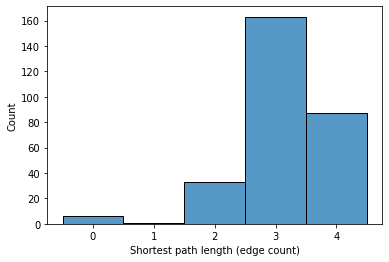

In [38]:
shortest_path_lens = []
has_shortest_path = 0
# for p in paths.values():
#     if len(p) > 0:
#         path_lens.append(len(p[0])-1)
for target in shortest_paths:
    if len(shortest_paths[target]) > 0:
        has_shortest_path += 1
        for path in shortest_paths[target]:
            shortest_path_lens.append(len(path)-1)
print(has_shortest_path)            
sns.histplot(shortest_path_lens, stat="count", discrete=True)
plt.xlabel('Shortest path length (edge count)')   

In [39]:
shortest_path_nodes = set([n for path_list in shortest_paths.values() for path in path_list for n in path])
len(shortest_path_nodes)

218

## Paths in CKN

In [40]:
# length in edges
longest_shortest_path_len = max(shortest_path_lens) 
longest_shortest_path_len

4

In [41]:
paths_pickle = output_dir / f"case2-directed-ranks{'.'.join([str(i) for i in keep_edge_ranks])}-{today}-paths.pickle"
paths_pickle

PosixPath('output/case2-directed-ranks0.1.2-2023.09.08-paths.pickle')

In [42]:
paths = {}

In [43]:
for i, node in enumerate(ca_targets):

    if node in paths:
        continue
        
    if node in ckn.nodes():
        print(i, node, end="\t")
    else:
        print(i, node, "not in CKN")
        print("--------------")
        continue
    
    node_paths = []    
    for source in ca_sources:
        try:
            new_paths = nx.all_simple_paths(ckn, source=source, target=node, cutoff=longest_shortest_path_len)
            new_paths = [p for p in new_paths]
            node_paths += new_paths
            
        except nx.exception.NetworkXNoPath:
            pass
            

    if len(node_paths) > 0:
        paths[node] = [p for p in node_paths]
        print(len(node_paths))
    else:
        paths[node] = []
        print("no paths")
    print("--------------")

with open(paths_pickle, 'wb') as handle:
    pickle.dump(paths, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [44]:
paths_pickle = output_dir / "case2-ranks0.1.2-2023.08.23-paths.pickle"
with open(paths_pickle, 'rb') as handle:
    paths = pickle.load(handle)

In [45]:
all_nodes = {n for t in paths for p in paths[t] for n in p}
len(all_nodes)

1965

Text(0.5, 0, 'Path length')

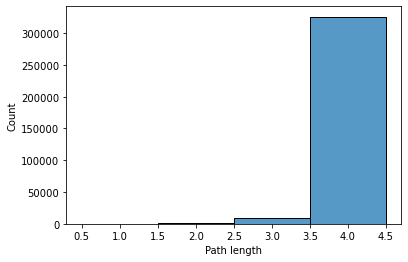

In [46]:
path_lens = []
has_path = 0
# for p in paths.values():
#     if len(p) > 0:
#         path_lens.append(len(p[0])-1)
for target in paths:
    if len(paths[target]) > 0:
        has_path += 1
        for path in paths[target]:
            path_lens.append(len(path)-1)
            
sns.histplot(path_lens, stat="count", discrete=True, bins=set(path_lens))
plt.xlabel('Path length') 

In [47]:
has_path

38

In [48]:
set(path_lens)

{1, 2, 3, 4}

In [49]:
print(len(paths))
print(len(path_lens))

38
335409


## Shortest path edges

In [50]:
shortest_path_target = defaultdict(list)
shortest_path_edges = []
for i, (node, path_list) in enumerate(shortest_paths.items()):
    for path in path_list:
        for s, t in zip(path, path[1:]):
            for (u, v) in ckn.edges():
                if (u==s) and (v==t):
                    shortest_path_edges.append((u, v))
                    shortest_path_target[(u, v)].append(node)
    print(i, node)

0 AT3G54170
1 AT5G54430
2 AT3G10380
3 AT3G60190
4 AT3G47340
5 AT3G56800
6 AT2G30520
7 AT5G18100
8 AT3G10340
9 AT1G66580
10 AT5G66030
11 AT1G45201
12 AT1G69250
13 AT1G13750
14 AT5G01600
15 AT3G50440
16 AT3G43540
17 AT3G43810
18 AT5G21274
19 AT5G53530
20 AT3G15090
21 AT3G53260
22 AT2G02100
23 AT2G41110
24 AT3G57870
25 AT2G13440
26 AT4G20760
27 AT3G16240
28 AT2G27030
29 AT4G17830
30 AT4G30490
31 AT4G23650
32 AT5G54180
33 AT5G56260
34 AT1G29690
35 AT3G07630
36 AT3G43270
37 AT3G07660


# Cuts on the merged shortest paths

In [56]:
path_graph = nx.edge_subgraph(ckn, edges=shortest_path_edges).copy()

In [57]:
# high rank more likely to be cut      
for u, v, d in path_graph.edges(data=True):
    d['capacity'] = int(d['rank']) + 1


In [58]:
# # alternatively: high rank less likly to be cut    
# basis_capacity = max([d['rank'] for u, v, d in source_sink_graph.edgeas(data=True)])
# for u, v, d in source_sink_graph.edges(data=True):
#     d['capacity'] = basis_capacity - int(d['rank'])

In [59]:
from skm_tools import cuts

In [182]:
cutset = cuts.get_cutset(ca_sources, ca_targets, path_graph)

max_flow = 125
True


In [64]:
all_cut_sets = {}
for target in ca_targets:
    if (path_graph.has_node(target)) and not (target in ca_sources):
        print(target)
        this_cutset = cuts.get_cutset(ca_sources, [target], path_graph)
        all_cut_sets[target] = this_cutset

AT3G54170
max_flow = 6
True
AT2G30520
max_flow = 2
True
AT5G54180
max_flow = 2
True
AT2G02100
max_flow = 2
True
AT3G10340
max_flow = 17
True
AT5G01600
max_flow = 3
True
AT3G16240
max_flow = 9
True
AT1G66580
max_flow = 7
True
AT4G17830
max_flow = 3
True
AT3G43270
max_flow = 3
True
AT3G15090
max_flow = 3
True
AT5G53530
max_flow = 9
True
AT1G45201
max_flow = 3
True
AT4G30490
max_flow = 17
True
AT3G43540
max_flow = 3
True
AT1G69250
max_flow = 3
True
AT5G18100
max_flow = 2
True
AT3G53260
max_flow = 8
True
AT4G20760
max_flow = 6
True
AT5G56260
max_flow = 6
True
AT1G13750
max_flow = 5
True
AT3G50440
max_flow = 3
True
AT3G07660
max_flow = 3
True
AT3G07630
max_flow = 3
True
AT3G57870
max_flow = 6
True
AT5G54430
max_flow = 4
True
AT3G10380
max_flow = 7
True
AT3G60190
max_flow = 2
True
AT2G13440
max_flow = 2
True
AT3G47340
max_flow = 5
True
AT1G29690
max_flow = 2
True
AT5G66030
max_flow = 3
True


# Context graph

In [66]:
more_nodes = set()
for node in ca_sources:
    more_nodes.update([x for x in nx.neighbors(ckn.to_undirected(), node)])
for node in ca_targets:
    more_nodes.update([x for x in nx.neighbors(ckn.to_undirected(), node)])    

In [67]:
print(len(more_nodes))

996


In [68]:
nodes_and_neighbours = set()
nodes_and_neighbours.update(all_nodes)
nodes_and_neighbours.update(more_nodes)

In [69]:
context_graph = nx.induced_subgraph(ckn, nodes_and_neighbours).copy()
print(f"\nNumber of nodes: {context_graph.number_of_nodes()}\nNumber of edges: {context_graph.number_of_edges()}")


Number of nodes: 2119
Number of edges: 30189


In [70]:
node_prot_data = df_data.loc[[x for x in context_graph.nodes() if x in df_data.index]]

In [72]:
nx.set_node_attributes(context_graph, node_prot_data.to_dict('index'))

# Table attributes from the networks

In [203]:
node_attributes = defaultdict(dict)

In [208]:
for node in all_nodes:
    node_attributes[node]['in-cutset'] = 0

for target in ca_targets:
    if (path_graph.has_node(target)) and not (target in ca_sources):
        this_cutset = all_cut_sets[target]
    
        for u, v in this_cutset:
            node_attributes[u]['in-cutset'] += 1
            node_attributes[v]['in-cutset'] += 1

            
for target in ca_targets:
    if (path_graph.has_node(target)) and not (target in ca_sources):
        this_cutset = all_cut_sets[target]
        node_attributes[target]['number-cuts'] = len(this_cutset)            

In [225]:
d = pd.DataFrame.from_dict(node_attributes, orient='index')[['in-degree', 'out-degree']]


In [226]:
d.loc['AT5G47100']

in-degree     0
out-degree    5
Name: AT5G47100, dtype: int64

In [223]:
type(i_d) ==int

False

In [227]:
d.to_csv("temp.tsv", sep="\t")

In [212]:
path_graph.out_degree('AT5G47100')

5

In [224]:
for node in all_nodes:
    i_d = path_graph.in_degree(node) 
    o_d = path_graph.out_degree(node)
    node_attributes[node]['in-degree'] = i_d if type(i_d) ==int else 0
    node_attributes[node]['out-degree'] = o_d if type(o_d) ==int else 0

    node_attributes[node]['number_shortest_paths'] = 0
    for path_target in shortest_paths:
        for this_paths in shortest_paths[path_target]:
            if node in this_paths:
                node_attributes[node]['number_shortest_paths'] += 1  

In [76]:
for node in ca_sources:
    if not (node in all_nodes):
        continue
    node_attributes[node]['targets_per_source'] = 0
    node_attributes[node]['reason'] = "source"
    for path_target in shortest_paths:
        for this_paths in shortest_paths[path_target]:
            if node in this_paths:
                node_attributes[node]['targets_per_source'] += 1

In [77]:
for node in ca_targets:
    node_attributes[node]['reason'] = "target"

    number_sources = len({p[0] for p in shortest_paths[node]})
    node_attributes[node]['sources_per_target'] = number_sources
    node_attributes[node]['sources'] = list({p[0] for p in shortest_paths[node]})

In [78]:
for target_node in shortest_paths:
    node_attributes[target_node][f'disjoint-shortest-path-from-any-source'] = 0
    for source_node in {p[0] for p in shortest_paths[target_node]}:
        if source_node == target_node:
            continue
#         node_attributes[target_node][f'disjoint-shortest-path-from-{source_node}'] = len([x for x in nx.edge_disjoint_paths(path_graph, source_node, target_node)])
        node_attributes[target_node][f'disjoint-shortest-path-from-any-source'] += len([x for x in nx.edge_disjoint_paths(path_graph, source_node, target_node)])

In [79]:
nx.set_node_attributes(context_graph, node_attributes)

In [80]:
nx.set_edge_attributes(context_graph, shortest_path_target, "path-target-nodes")
nx.set_edge_attributes(context_graph, {n:True for n in shortest_path_target}, "on-shortest-path")

# Cytoscape

Load the required library, and make sure you can connect to Cytoscape. 

More py4cytoscape documentation is here: https://py4cytoscape.readthedocs.io/

In [81]:
import py4cytoscape as p4c
p4c.cytoscape_ping();

You are connected to Cytoscape!


In [82]:
from skm_tools import cytoscape_utils

We set the Cytoscape collection name for this notebook. 

In [83]:
COLLECTION = f"Case 2: CKN ranks {'|'.join([str(i) for i in keep_edge_ranks])} ({today})"
COLLECTION

'Case 2: CKN ranks 0|1|2 (2023.09.08)'

In [88]:
ckn_network_suid = p4c.networks.create_network_from_networkx(
        context_graph, 
        title=f"Merged paths (len {longest_shortest_path_len}) and st neighbours (node induced) ranks {'|'.join([str(i) for i in keep_edge_ranks])}", 
        collection=COLLECTION
)
cytoscape_utils.apply_builtin_style(ckn_network_suid, 'ckn')
p4c.layout_network("cose", network=ckn_network_suid)
ckn_network_suid

In [85]:
cytoscape_utils.highlight_nodes(
    ca_sources,
    border_color="#E70084",
    border_width=25,
    node_height=80,
    node_width=80,
    network=ckn_network_suid    
)

In [86]:
cytoscape_utils.highlight_nodes(
    ca_targets,
    colour="#13713C",
    label_color='white',
    node_height=80,
    node_width=80,
    network=ckn_network_suid    
)

In [95]:
shortest_paths_suid = cytoscape_utils.subnetwork_edge_induced_from_paths(
    [paths for target in shortest_paths for paths in shortest_paths[target]], 
    context_graph, 
    ckn_network_suid, 
    name="Shorted paths (edge induced)"
)

In [103]:
graph_node_induced_suid = cytoscape_utils.subnetwork_node_induced(
    shortest_path_nodes, 
    ckn_network_suid,
    name=f"Shortest paths (node induced)"
)
p4c.layout_copycat(shortest_paths_suid, graph_node_induced_suid)

{'mappedNodeCount': 218, 'unmappedNodeCount': 0}

## Cuts

In [96]:
shortest_paths_with_cuts_suid = cytoscape_utils.subnetwork_edge_induced_from_paths(
    [paths for target in shortest_paths for paths in shortest_paths[target]], 
    context_graph, 
    ckn_network_suid, 
    name="Shorted paths (edge induced) with_cuts"
)

In [98]:
for (target, cutset) in all_cut_sets.items():
    print(target, 'red', cutset)
    _ = cytoscape_utils.highlight_edges(cutset, 'red')

AT3G54170 red [('AT1G31880', 'AT3G54170'), ('AT1G54770', 'AT3G54170')]
AT2G30520 red [('AT2G42580', 'AT2G30520')]
AT5G54180 red [('AT4G13670', 'AT5G54180')]
AT2G02100 red [('AT2G01760', 'AT2G02100')]
AT3G10340 red [('AT1G15670', 'AT3G10340'), ('AT2G37040', 'AT3G10340'), ('AT5G15210', 'AT3G10340'), ('AT5G44210', 'AT3G10340'), ('AT5G47220', 'AT3G10340'), ('AT5G60690', 'AT3G10340')]
AT5G01600 red [('AT2G43010', 'AT5G01600')]
AT3G16240 red [('AT4G19030', 'AT3G16240'), ('AT4G35580', 'AT3G16240'), ('AT5G22290', 'AT3G16240')]
AT1G66580 red [('AT1G14320', 'AT1G66580'), ('AT1G48830', 'AT1G66580'), ('AT1G76810', 'AT1G66580')]
AT4G17830 red [('AT3G20770', 'AT4G17830')]
AT3G43270 red [('AT2G43010', 'AT3G43270')]
AT3G15090 red [('AT5G47100', 'AT3G15090')]
AT5G53530 red [('AT1G53720', 'AT5G53530'), ('AT1G66150', 'AT5G53530'), ('AT3G17840', 'AT3G51310'), ('AT4G27690', 'AT5G53530')]
AT1G45201 red [('AT5G61850', 'AT1G45201')]
AT4G30490 red [('AT3G01280', 'AT4G30490'), ('AT3G27960', 'AT4G30490'), ('AT3G

## Grouping source type

In [106]:
# functions to extract subgraph based on sources 

def list_overlap(a, b):
    return len(a.intersection(b)) > 0

def subnet_from_sources(sources):
    s_paths = []
    for node in ca_targets:
        if list_overlap(set(node_attributes[node]['sources']), sources):
            for p in shortest_paths[node]:
                if p[0] in sources:
                    s_paths.append(p)
    return s_paths
    

In [104]:
cams = set([
    'AT5G37780',
    'AT2G41110',
    'AT3G56800',
    'AT1G66410',
    'AT2G27030',
    'AT5G21274',
    'AT3G43810',
    'AT4G14640',
    'AT3G51920',
    'AT2G41010',
])

cbls = set([
    'AT5G47100',
    'AT4G26570',
    'AT5G55990',
    'AT5G24270',
    'AT4G17615'
])

cmls = set([
'AT2G41410',
'AT3G50770',
'AT3G29310',
'AT1G66400',
'AT3G22930',
'AT2G41090',
'AT3G03000',
'AT4G38810'        
])

cdpks = set([
    'AT4G23650',
    'AT4G09570',
    'AT1G74740',
    'AT1G76040',
    'AT1G35670',
    'AT5G19450',
    'AT5G04870'    
])

In [108]:
shortest_paths_with_cuts_suid = 65452

In [109]:
for label, list_with_label in [("CAMs", cams), 
                               ("CBLs", cbls),
                               ("CMLs", cmls), 
                               ("CDPKs", cdpks)
                              ]:
    paths_from_label = subnet_from_sources(list_with_label)
    label_graph_edge_induced = cytoscape_utils.subnetwork_edge_induced_from_paths(
        paths_from_label, 
        context_graph,
        shortest_paths_with_cuts_suid,
        name=f"{label} - shortest paths merged (edge induced)"
    )


## Layout by groups

Using graphiz via pygraphvis (in networkx)

In [147]:
A = nx.nx_agraph.to_agraph(path_graph)

for label, list_with_label in [("CAMs", cams), 
                               ("CBLs", cbls),
                               ("CMLs", cmls), 
                               ("CDPKs", cdpks)
                              ]:
    _ = A.add_subgraph(list_with_label, name=label, rank="same")

A.layout(prog="dot")  # use dot

In [148]:
coords = {}
for id_ in A.nodes_iter():
    n = A.get_node(id_)
    c = [float(x) for x in n.attr['pos'].split(',')]
    coords[id_] = (c[0], -c[1]*10)

In [149]:
table = pd.DataFrame.from_dict(coords, orient='index')
table.columns = ['x', 'y']
table.head()

,x,y
AT3G43810,3077.9,-3060.0
AT3G51920,2699.9,-3060.0
AT3G56800,2951.9,-3060.0
AT4G14640,2258.9,-3060.0
AT5G21274,2573.9,-3060.0


In [154]:
relayout_suid = cytoscape_utils.subnetwork_edge_induced_from_paths(
    [paths for target in shortest_paths for paths in shortest_paths[target]], 
    context_graph, 
    ckn_network_suid, 
    name="Shorted paths (edge induced), graphviz layout"
)

In [157]:
cytoscape_utils.layout_from_coords(relayout_suid, table)

## View proteomics data

In [159]:
prot_suid = cytoscape_utils.subnetwork_edge_induced_from_paths(
    [paths for target in shortest_paths for paths in shortest_paths[target]], 
    context_graph, 
    ckn_network_suid, 
    name="Shorted paths (edge induced), graphviz layout, with heatmap"
)
p4c.layout_copycat(relayout_suid, prot_suid)

{'mappedNodeCount': 218, 'unmappedNodeCount': 0}

In [161]:
new_style = 'CKN-proteomics'
p4c.copy_visual_style('CKN-default', new_style)
p4c.set_visual_style(new_style, network=prot_suid)

{'message': 'Visual Style applied.'}

Below function creates a png for a node, based on the proteomics abundancy data

In [177]:
import matplotlib.pyplot as plt
import numpy as np

fig_data = [
    ['Mock|Mock vs Mock|H2O2 (10 min)', 'La3+|Mock vs La3+|H2O2 (10 min)'],
    ['Mock|Mock vs Mock|H2O2 (30 min)', 'La3+|Mock vs La3+|H2O2 (30 min)']
]

log_FC_suffix = ' log-FC'
pvalue_suffix = ' p-value'
pvalue_cutoff = 0.05

fig_data = np.array(fig_data)  

node_png_dir = output_dir / "node_png"
if not node_png_dir.exists():
    node_png_dir.mkdir()

def create_png(node):
   
    if not (node in df_data.index):
        return None

    plt.figure()
    plt.axis('off')
    
    r = node_prot_data.loc[node]
    a = np.array([
        [r[fig_data[0, 0]+log_FC_suffix], r[fig_data[0, 1]+log_FC_suffix]],
        [r[fig_data[1, 0]+log_FC_suffix], r[fig_data[1, 1]+log_FC_suffix]],
    ])
    
    p = np.array([
        [r[fig_data[0, 0]+pvalue_suffix], r[fig_data[0, 1]+pvalue_suffix]],
        [r[fig_data[1, 0]+pvalue_suffix], r[fig_data[1, 1]+pvalue_suffix]],
    ])
    
    # functions plot from bottom to top
    a = np.flipud(a)
    p = np.flipud(p)

    fig =plt.pcolormesh(
        a, # plots from bottom
        cmap='bwr',
        vmin=-1, vmax=1,
        edgecolors='k', linewidth=4
    )
    fig.cmap.set_bad('lightgrey')
    
    for x, y in [[0, 0], [0, 1], [1,0], [1,1]]:
        if p[x, y] < 0.05:
            plt.plot(y + 0.5, x + 0.5, 
                     marker=(6, 2, 0), 
                     markersize=30, 
                     markeredgecolor="white", 
                     markeredgewidth=5)
         
    plt.gca().set_aspect('equal')

    node_png_fname = node_png_dir / f'{node}.png'
    plt.savefig(node_png_fname,bbox_inches='tight',transparent=True, pad_inches=0)
    plt.close()
    return node_png_fname
    
    
    

In [178]:
cytoscape_utils.add_custom_png(prot_file, create_png, style=None)

In [179]:
# END